In [ ]:
import pandas as pd
from pandas.core.describe import DataFrameDescriber
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
data = pd.read_csv('report_1694972319711.csv',
                 sep=';',
                 header=None)

In [ ]:
data

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,NaN,брой,брой,брой,брой,брой,брой,брой,брой,брой,...,брой,брой,брой,брой,брой,брой,брой,брой,брой,NaN
1,NaN,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,NaN
2,NaN,Общо,Общо,Общо,Общо,Общо,Общо,Общо,Общо,Общо,...,Общо,Общо,Общо,Общо,Общо,Общо,Общо,Общо,Общо,NaN
3,Общо за страната,7845841,7801273,7761049,7718750,7679290,7640238,7606551,7563710,7504868,...,7202198,7153784,7101859,7050034,7000039,6951482,6916548,6838937,6447710,NaN


In [ ]:
data.shape

(4, 23)

In [ ]:
df = data.transpose()

In [ ]:
df.drop([0, 2], axis=1, inplace=True)

# Reset the index
df.reset_index(drop=True, inplace=True)
df.dropna(inplace=True)

In [ ]:
df=df.rename(columns={3:'population', 1:'year'})

In [ ]:
# Set the index to be the year column
df.set_index('year', inplace=True)

In [ ]:
df.head()

,population
year,
2002,7845841
2003,7801273
2004,7761049
2005,7718750
2006,7679290


In [ ]:
# Convert the index to a DatetimeIndex
df.index = pd.to_datetime(df.index, format='%Y')

In [ ]:
yearly_population = df.population.astype(float).resample('A').mean()

In [ ]:
yearly_population.head()

year
2002-12-31    7845841.0
2003-12-31    7801273.0
2004-12-31    7761049.0
2005-12-31    7718750.0
2006-12-31    7679290.0
Freq: A-DEC, Name: population, dtype: float64

In [ ]:
# Split the data into training and testing sets
train = yearly_population[:5]
test = yearly_population[-5:]

In [ ]:
import numpy as np

In [ ]:
X = yearly_population.index.year
y = yearly_population.values
X = np.array(X).reshape(-1, 1)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model_df = DecisionTreeRegressor()
model_df.fit(X, y)

DecisionTreeRegressor()

In [ ]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(X, y)

LinearRegression()

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

model_knn = KNeighborsRegressor(n_neighbors=5)
model_knn.fit(X, y)

KNeighborsRegressor()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(n_estimators=100)
model_rf.fit(X, y)

RandomForestRegressor()

In [ ]:
model = ExponentialSmoothing(train, seasonal_periods=5, trend='add', seasonal='add')
model = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [ ]:
last_year = yearly_population.index.year[-1]

future_years = pd.date_range(start=f"{last_year+1}-01-01", periods=30, freq='A-DEC')

X_extended = pd.concat([X, pd.DataFrame(future_years.year, columns=['year'])], axis=0)

X_extended.reset_index(drop=True, inplace=True)

TypeError: ignored

In [ ]:
forecast_df = model_df.predict(X)
forecast_rf = model_rf.predict(X)
forecast_knn = model_knn.predict(X)
forecast_lr = model_lr.predict(X)

In [ ]:
# Plot the actual population data and the forecast
plt.figure(figsize = [12,6])
plt.plot(yearly_population.index, yearly_population, label='Training Data', color='blue', linewidth=2)

print(forecast_df)

plt.plot(forecast_df, forecast_df, label='DF', color='green', linewidth=2)
plt.plot(forecast_rf.index, forecast_rf, label='RF', color='orange', linewidth=2)
plt.plot(forecast_knn.index, forecast_knn, label='KNN', color='purple', linewidth=2)
plt.plot(forecast_lr.index, forecast_lr, label='LR', color='red', linewidth=2)

plt.xlabel('Year', fontsize=14)
plt.ylabel('Population', fontsize=14)
plt.title('Population Forecast', fontsize=18)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

[7845841. 7801273. 7761049. 7718750. 7679290. 7640238. 7606551. 7563710.
 7504868. 7327224. 7284552. 7245677. 7202198. 7153784. 7101859. 7050034.
 7000039. 6951482. 6916548. 6838937. 6447710.]


AttributeError: ignored

Error in callback <function _draw_all_if_interactive at 0x79efe02f1b40> (for post_execute):


ValueError: ignored

ValueError: ignored

<Figure size 1200x600 with 1 Axes>

In [ ]:
x = df.drop(columns=['population'])['year'].astype(int)
x = x.values.reshape(-1, 1)
y = df['population'].astype(int)

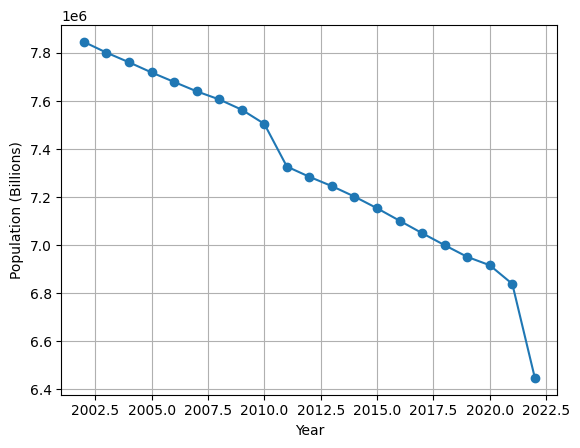

In [ ]:
plt.plot(x, y, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Population (Billions)')
plt.grid(True)
plt.show()

In [ ]:
lm = LinearRegression()
lm.fit(x, y)

LinearRegression()

In [ ]:
y_pred = lm.predict(x)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

relative_accuracy = (1 - mae / np.mean(y)) * 100

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 49852.38
Mean Squared Error (MSE): 5463488192.18
Root Mean Squared Error (RMSE): 73915.41
Relative Accuracy: 99.32%


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
model_performances = {}

# Define and train the models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Support Vector Regressor': SVR()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Store the performance metrics in the dictionary
    model_performances[model_name] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R-squared': r2
    }

# Display the performance metrics for each model
for model_name, metrics in model_performances.items():
    print(f"Model: {model_name}")
    print(f"MAE: {metrics['MAE']:.2f}")
    print(f"MSE: {metrics['MSE']:.2f}")
    print(f"RMSE: {metrics['RMSE']:.2f}")
    print(f"R-squared: {metrics['R-squared']:.2f}")
    print()

Model: Linear Regression
MAE: 69710.32
MSE: 5084103277.06
RMSE: 71302.90
R-squared: 0.96

Model: Decision Tree Regressor
MAE: 56848.00
MSE: 3462729455.60
RMSE: 58844.96
R-squared: 0.97

Model: Random Forest Regressor
MAE: 47531.13
MSE: 3559608589.68
RMSE: 59662.46
R-squared: 0.97

Model: Support Vector Regressor
MAE: 377066.06
MSE: 165360087224.22
RMSE: 406644.92
R-squared: -0.20

